<a href="https://colab.research.google.com/github/skaty5678/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_SANJEEV_KUMAR_THAKUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### **id** - a unique identifier for each trip
* #### **vendor_id** - a code indicating the provider associated with the trip record
* #### **pickup_datetime** - date and time when the meter was engaged
* #### **dropoff_datetime** - date and time when the meter was disengaged
* #### **passenger_count** - the number of passengers in the vehicle (driver entered value)
* #### **pickup_longitude** - the longitude where the meter was engaged
* #### **pickup_latitude** - the latitude where the meter was engaged
* #### **dropoff_longitude** - the longitude where the meter was disengaged
* #### **dropoff_latitude** - the latitude where the meter was disengaged
* #### **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### **trip_duration** - duration of the trip in seconds

#**Why is it important ?**

##**Predicting the duration of a taxi trip is very important since a user would always like to know precisely how much time it would require of him to travel from one place to another. Given the rising popularity of app-based taxi usage through common vendors like Ola and Uber, competitive pricing has to be offered to ensure users choose them. Prediction of duration and price of trips can help users to plan their trips properly, thus keeping potential margins for traffic congestions.**

#<b>Setting the stage for our Dataset</b>


In [ ]:
#Bringing in all the important libraries required for a smooth data visualization.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#the raw data

raw_df = pd.read_csv('/content/drive/MyDrive/Copy of NYC Taxi Data.csv')

In [ ]:
raw_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
raw_df.shape

(1458644, 11)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
raw_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
#dealing with the null values
def missing_values(df):

  #total of missing values for each column
  total_missing_value = df.isna().sum()

  #percentage of missing values 
  percent_missing_value = total_missing_value*100/len(df)

  #making a table of the above results
  table = pd.concat([total_missing_value,percent_missing_value],axis = 1)

  #renaming the columns
  table.rename(columns = {0:'missing values',1:'percent of missing values'},inplace = True)

  #sorting the table in decreasing order by percentage of missing values
  missing_values_table = table.sort_values('percent of missing values',ascending = False).round(1)

  return missing_values_table

In [ ]:
missing_values(raw_df)

,missing values,percent of missing values
id,0,0.0
vendor_id,0,0.0
pickup_datetime,0,0.0
dropoff_datetime,0,0.0
passenger_count,0,0.0
pickup_longitude,0,0.0
pickup_latitude,0,0.0
dropoff_longitude,0,0.0
dropoff_latitude,0,0.0
store_and_fwd_flag,0,0.0


###The dataset has no null values.

In [ ]:
#checking for numeric columns
numeric_features = raw_df.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

In [ ]:
#checking for categorical columns
categorical_features = raw_df.describe(include=['object','category']).columns
categorical_features

Index(['id', 'pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag'], dtype='object')

#<b>Data preparation for Exploratory Data Analysis and Visualizations.</b>

##Before we start running our model on the dataset. First we will try to interpret what the data is trying to convey by extracting necessary information from it and using EDA and graphical visualisations.

In [ ]:
df = raw_df.copy()

In [ ]:
#converting pickup_datetime and dropoff_datetime from object type to datetime to extract useful information from them
df[["pickup_datetime", "dropoff_datetime"]] = df[["pickup_datetime", "dropoff_datetime"]].apply(pd.to_datetime)


###We can see that we have coordinates in the form of longitude and latitude for pickup and dropoff. But, we can’t really gather any insights or draw conclusions from that.So, the most obvious feature that we can extract from this is distance.And for that we will use Haversine to extract distance from given coordinates in km.

In [ ]:
#installing haversine
%%capture
pip install haversine

In [ ]:
#importing haversine library
from haversine import haversine,Unit

In [ ]:
def haversine_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    dropoff = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, dropoff)

In [ ]:
df['distance'] = df.apply(lambda x: haversine_distance(x), axis = 1)


In [ ]:
df.shape

(1458644, 12)

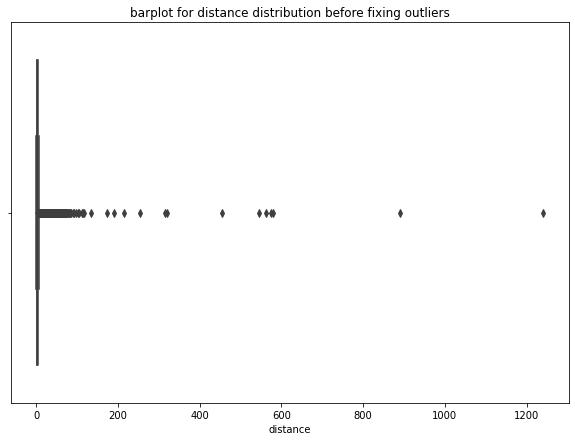

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(df['distance'], orient='horizontal')
plt.title('barplot for distance distribution before fixing outliers')
plt.show()

In [ ]:
df[df['distance'] == 0].value_counts().sum()

5897

###We can see that close to 6000 trips have travelled zero distance which is a bit absurd but some possible reasons for that could be that 
###1.The passenger or the driver cancelled the trip just after the acceptance of the trip. 
###2.Technical issue occured due to which dropoff location couldn't be recorded properly so that is why it is the same as the pickup location.
###3.There was an issue with GPS tracker.

###Let's get rid of the records where distance was zero as they are not going to add any value to our model.

In [ ]:
df = df[~(df.distance == 0)]

In [ ]:
df.shape

(1452747, 12)

In [ ]:
#Creating a new feature speed
df['speed'] = (df.distance/(df.trip_duration/3600))


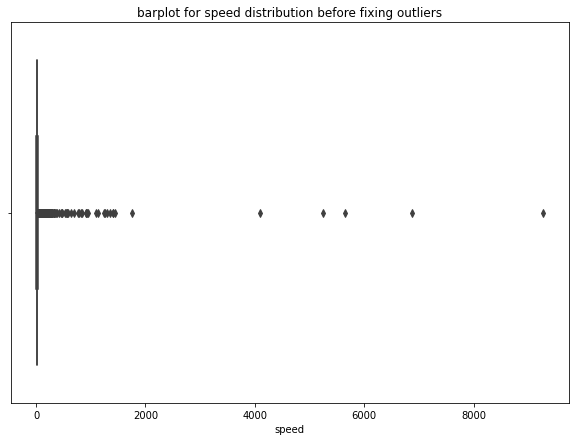

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(df['speed'], orient='horizontal')
plt.title('barplot for speed distribution before fixing outliers')
plt.show()

In [ ]:
df.shape

(1452747, 13)

### As far as knowledge goes NYC cab providers don't give Bugatti Chiron or  McLaren F1 as a cab so we'll get rid of all the records where the speed exceeded the 110 kmph :). NYC speed limit for state highways is close to 90 kmph.

In [ ]:
df = df[~(df.speed < 1)]
df = df[~(df.speed > 110)]

In [ ]:
df.shape

(1445255, 13)

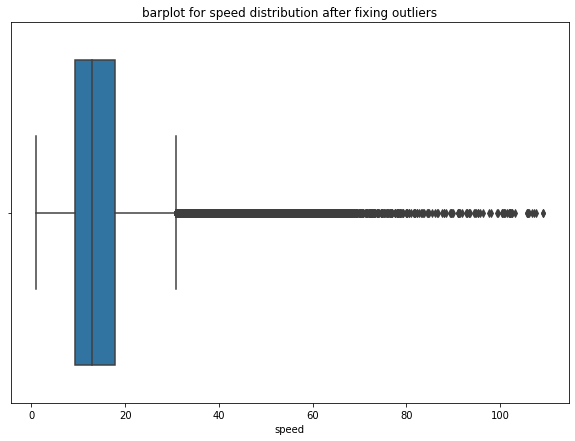

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(df['speed'], orient='horizontal')
plt.title('barplot for speed distribution after fixing outliers')
plt.show()

###We can remove the trips with passenger counts with more than 6 since they are very few in number and seem to be quite odd to fit more than 6 people in a single cab and for passenger with zero count we will replace them with floor value of the mean of the passenger count because maybe the driver forgot to pin the number of passengers.

In [ ]:
df.passenger_count.mean()

1.6642502534154873

In [ ]:
df = df[df.passenger_count <=6]
df['passenger_count'] = df.passenger_count.map(lambda x: 1 if x == 0 else x)


In [ ]:
df.passenger_count.value_counts()

1    1024149
2     208433
5      77385
3      59370
6      47791
4      28127
Name: passenger_count, dtype: int64

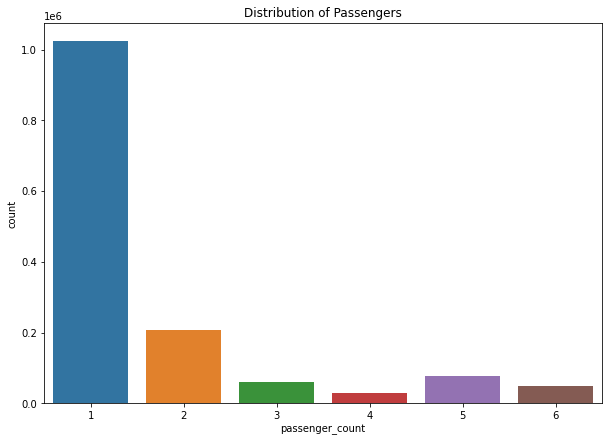

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(df['passenger_count'])
plt.title('Distribution of Passengers')
plt.show()

###Well it's quite visible that people don't like company while travelling and to be left alone atleast while travelling :). Very rarely it can be seen people travelling in a group.


In [ ]:
#Extracting information from pickup_datetime about the month, week and hour of pickup

df['month'] = df.pickup_datetime.dt.month
df['pickup_day']=df.pickup_datetime.dt.day_name()
df['pickup_hour'] = df.pickup_datetime.dt.hour

In [ ]:
#Extracting information from dropoff_datetime about the month, week and hour of dropoff

df['dropff_day']=df.dropoff_datetime.dt.day_name()
df['dropff_hour'] = df.dropoff_datetime.dt.hour

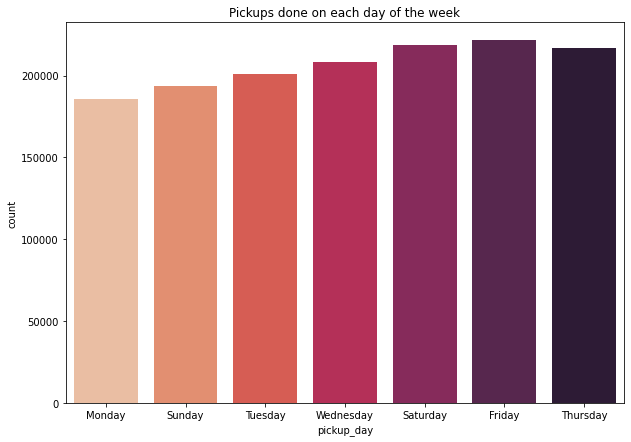

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='pickup_day',data=df,palette='rocket_r')
plt.title('Pickups done on each day of the week')
plt.show()

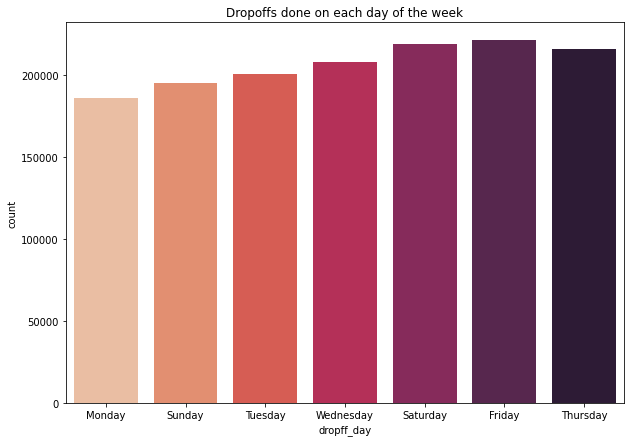

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='dropff_day',data=df,palette='rocket_r')
plt.title('Dropoffs done on each day of the week')
plt.show()

###Most number of pickups have happened on Friday while Monday has witnessed the least number of pickups. And same is the case when it comes for dropoffs.

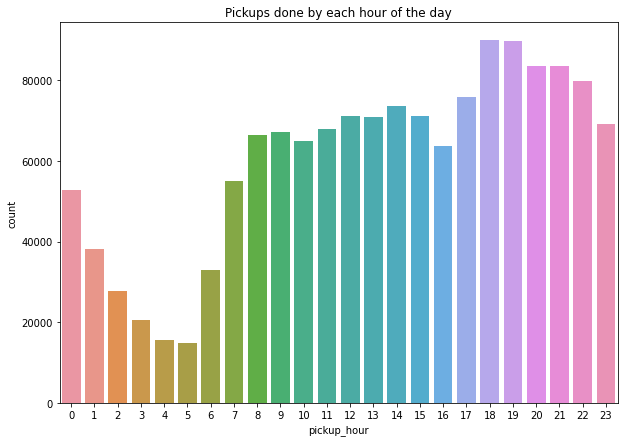

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='pickup_hour',data=df)
plt.title('Pickups done by each hour of the day')
plt.show()

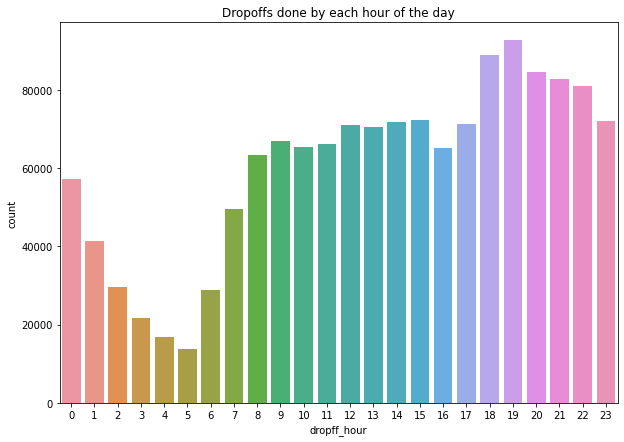

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='dropff_hour',data=df)
plt.title('Dropoffs done by each hour of the day')
plt.show()

###We can observe that most pickups and drops happen round the time between 3 PM to 9 PM . While the least number of drops and pickups occur between 2 AM to 7 AM. A possible reason for this could be that most number of office going people travel via metro or whatever public transport service is there in the morning for travelling but when heading back from office people are actually very tired to travel in a public transport so they prefer cabs.


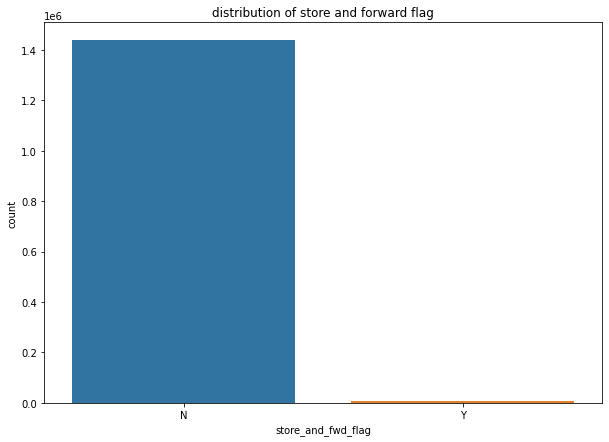

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='store_and_fwd_flag',data=df)
plt.title('distribution of store and forward flag')
plt.show()

###We can see that there are a minimal number of trips that were stored before forwarding.



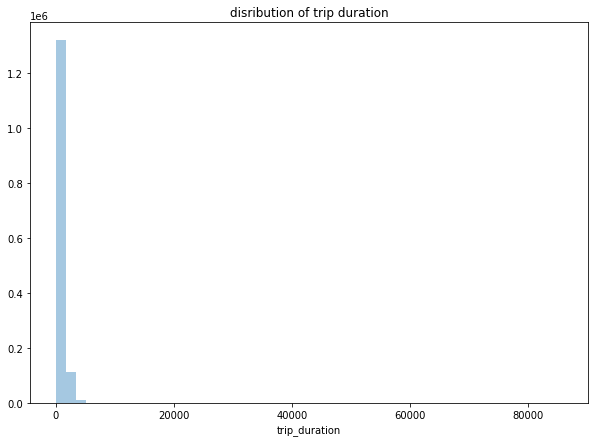

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(df['trip_duration'],kde=False)
plt.title('disribution of trip duration')
plt.show()


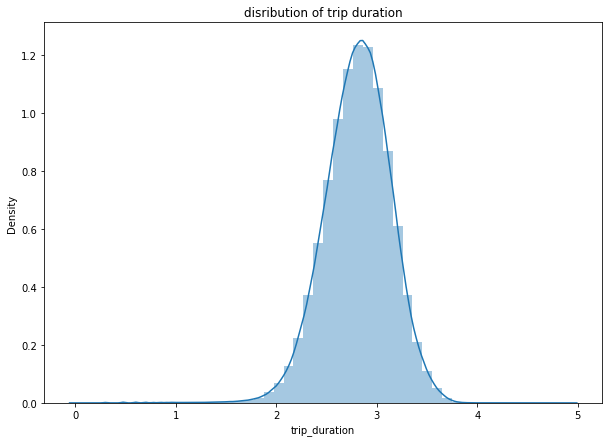

In [ ]:
# Dependent variable 'trip_duration'
plt.figure(figsize=(10,7))
sns.distplot(np.log10(df['trip_duration']))
plt.title('disribution of trip duration')
plt.show()

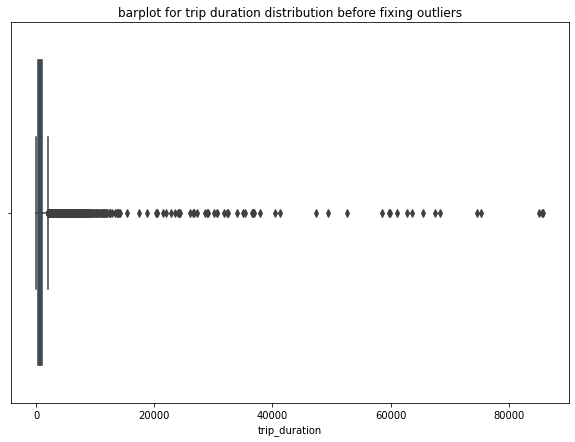

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(df['trip_duration'], orient='horizontal')
plt.title('barplot for trip duration distribution before fixing outliers')
plt.show()

###This histogram and boxplot show that there is extreme right skewness and hence there are some outliers.

In [ ]:
df = df[df.trip_duration <= 86392]

In [ ]:
df = df[~(df.trip_duration <= 60)]

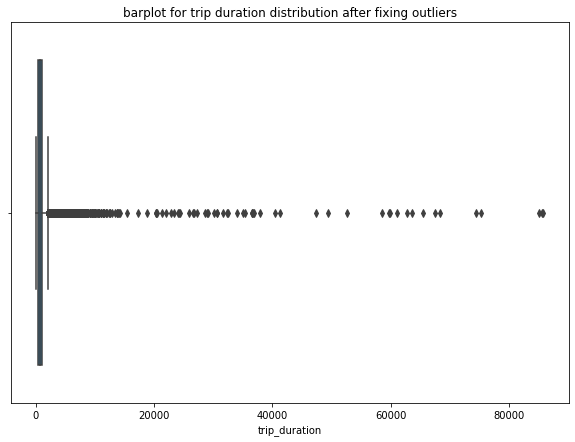

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(df['trip_duration'], orient='horizontal')
plt.title('barplot for trip duration distribution after fixing outliers')
plt.show()

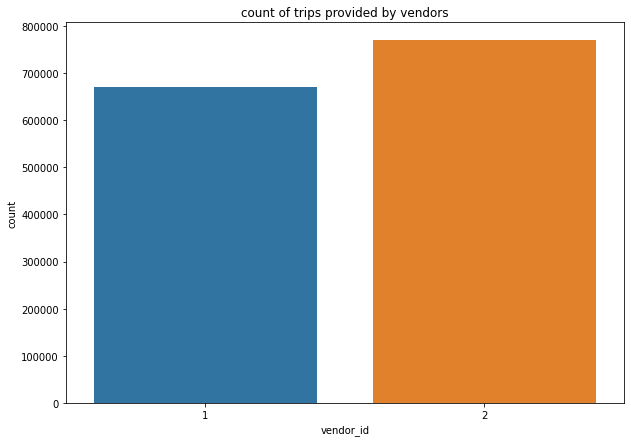

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='vendor_id',data=df)
plt.title('count of trips provided by vendors')
plt.show()

###Not that huge a difference can be observed in case of vendors.

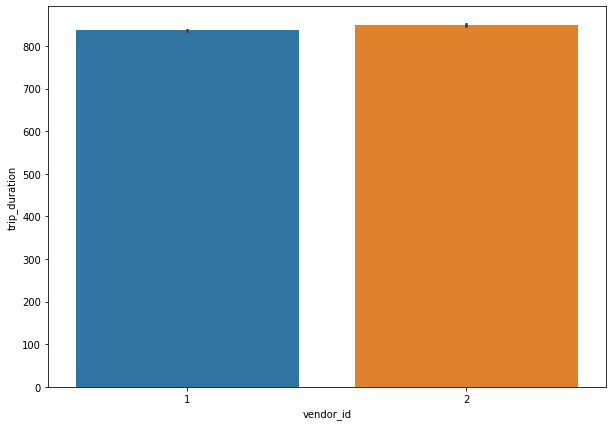

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(y='trip_duration',x='vendor_id',data=df,estimator=np.mean)
plt.show()

###It is evident from the above graph that vandor 2 has taken longer trips in comparison to vendor 1.

<Figure size 720x504 with 0 Axes>

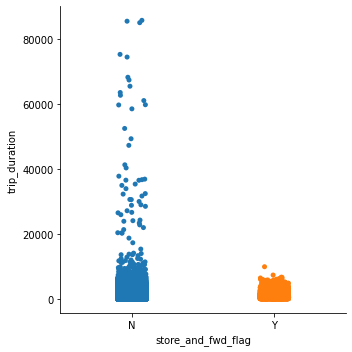

In [ ]:
plt.figure(figsize=(10,7))
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=df)
plt.show()

###Trips duration were longer for those whose flag was not stored before the trip started.

<Figure size 720x504 with 0 Axes>

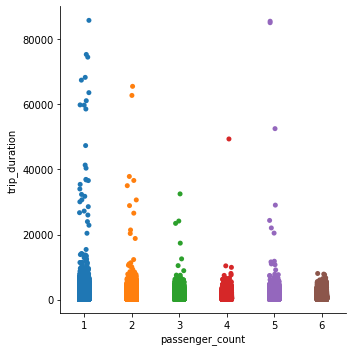

In [ ]:
plt.figure(figsize=(10,7))
sns.catplot(x='passenger_count',y='trip_duration',data=df)
plt.show()

###A very significant visible difference could not be established except the fact that trips of all the durations have been done for passenger count 1.

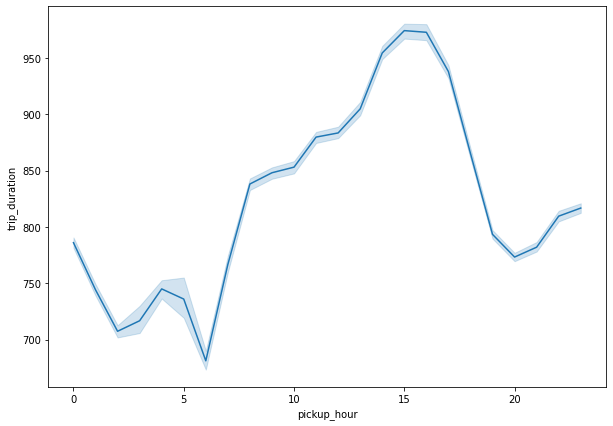

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(x='pickup_hour',y='trip_duration',data=df,markers=True)
plt.show()

###Pickup hours between 14 to 18 hours has experienced the highest trip durations maybe because of the traffic.

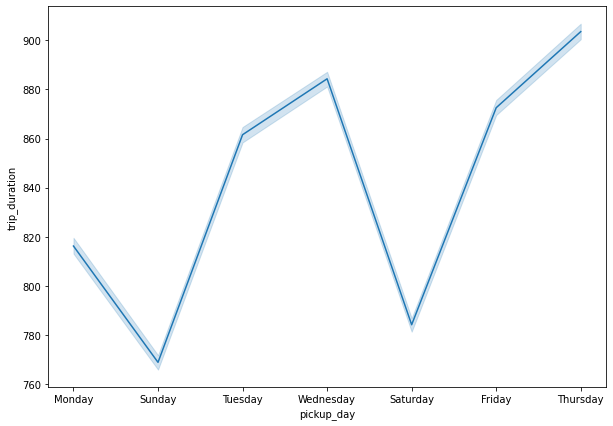

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(x='pickup_day',y='trip_duration',data=df,markers=True)
plt.show()

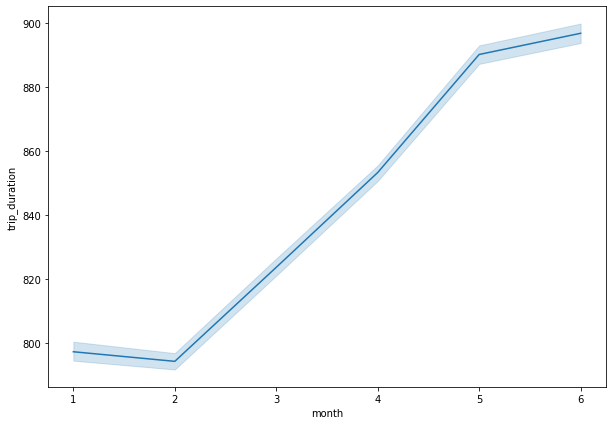

In [ ]:
plt.figure(figsize=(10,7))
sns.lineplot(x='month',y='trip_duration',data=df,markers=True)
plt.show()

###A possible reason for this behaviour could be that January, February have an average temperature of 4-5 degree celcius leading to low visibility because of smog and possibly people prefer not to take cabs as it is more prone to accidents but from March onwards the weather becomes more pleasant and people prefer cabs. 

<Figure size 720x504 with 0 Axes>

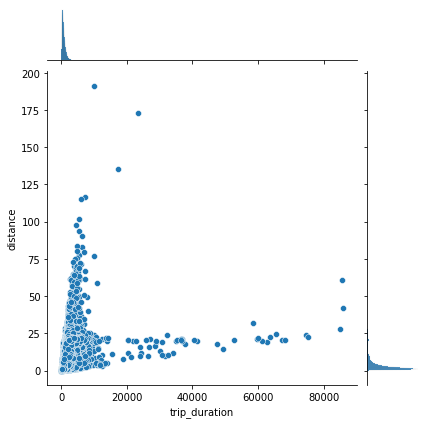

In [ ]:
plt.figure(figsize=(10,7))
sns.jointplot(data=df, x="trip_duration", y="distance")
plt.show()

###We can interpret some interesting observations from this graph - cluster can be seen for the distance from 0 to 25 kms and for the same the trip duration being in the range from 0 to 3-4 hrs.

###2 or 3 trips are there with duration of almost whole day and still the distance tarvelled is close to 50kms and less than that. A possible and more logical reason could be that they might have booked the cab for the whole day for long trips most probably.

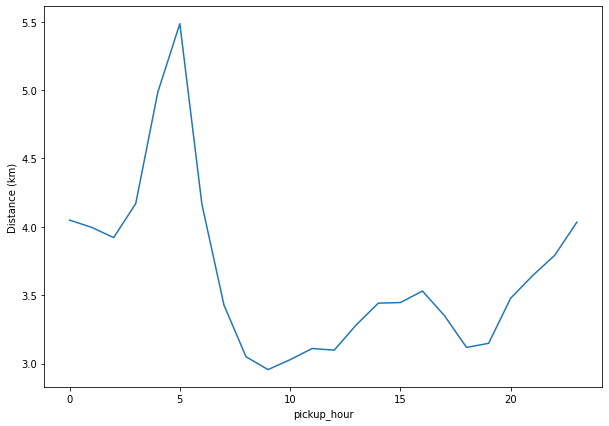

In [ ]:
groupby_1 = df.groupby(['pickup_hour']).distance.mean()
plt.figure(figsize=(10,7))
sns.lineplot(x = groupby_1.index,y=groupby_1.values,markers=True)
plt.ylabel('Distance (km)')
plt.show()

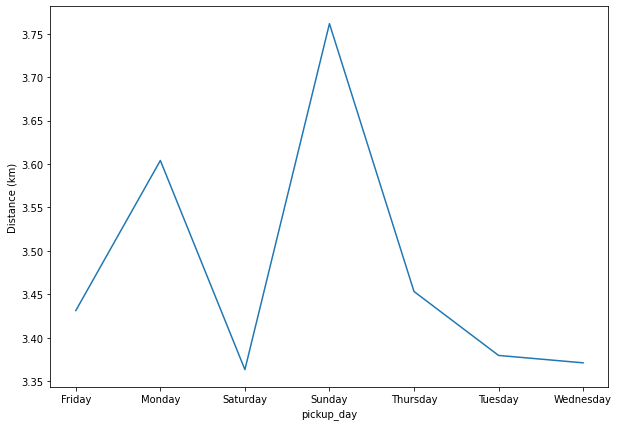

In [ ]:
groupby_2 = df.groupby(['pickup_day']).distance.mean()
plt.figure(figsize=(10,7))
sns.lineplot(x = groupby_2.index,y=groupby_2.values,markers=True)
plt.ylabel('Distance (km)')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439744 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1439744 non-null  object        
 1   vendor_id           1439744 non-null  int64         
 2   pickup_datetime     1439744 non-null  datetime64[ns]
 3   dropoff_datetime    1439744 non-null  datetime64[ns]
 4   passenger_count     1439744 non-null  int64         
 5   pickup_longitude    1439744 non-null  float64       
 6   pickup_latitude     1439744 non-null  float64       
 7   dropoff_longitude   1439744 non-null  float64       
 8   dropoff_latitude    1439744 non-null  float64       
 9   store_and_fwd_flag  1439744 non-null  object        
 10  trip_duration       1439744 non-null  int64         
 11  distance            1439744 non-null  float64       
 12  speed               1439744 non-null  float64       
 13  month       

In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,speed,month,pickup_hour,dropff_hour
count,1.439744e+06,1.439744e+06,1.439744e+06,1.439744e+06,1.439744e+06,1.439744e+06,1.439744e+06,1.439744e+06,1.439744e+06,1.439744e+06,1.439744e+06,1.439744e+06
mean,1.534412e+00,1.664950e+00,-7.397362e+01,4.075099e+01,-7.397353e+01,4.075189e+01,8.428669e+02,3.474868e+00,1.448372e+01,3.516643e+00,1.361405e+01,1.360748e+01
std,4.988146e-01,1.314139e+00,3.777181e-02,2.787622e-02,3.567781e-02,3.221956e-02,7.094623e+02,3.959168e+00,7.628685e+00,1.680869e+00,6.396653e+00,6.480527e+00
min,1.000000e+00,1.000000e+00,-7.545592e+01,3.980393e+01,-7.613572e+01,4.024363e+01,6.100000e+01,1.863055e-02,1.000492e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073742e+01,-7.399133e+01,4.073595e+01,4.010000e+02,1.256944e+00,9.229763e+00,2.000000e+00,9.000000e+00,9.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398178e+01,4.075414e+01,-7.397978e+01,4.075456e+01,6.650000e+02,2.118666e+00,1.285943e+01,4.000000e+00,1.400000e+01,1.400000e+01
75%,2.000000e+00,2.000000e+00,-7.396750e+01,4.076836e+01,-7.396316e+01,4.076982e+01,1.076000e+03,3.911277e+00,1.788777e+01,5.000000e+00,1.900000e+01,1.900000e+01
max,2.000000e+00,6.000000e+00,-7.323800e+01,4.169680e+01,-7.271140e+01,4.169335e+01,8.582800e+04,1.914031e+02,1.091177e+02,6.000000e+00,2.300000e+01,2.300000e+01


#Given that we need to predict the trip duration from the features provided we will run regression model.
#We will run 3 models on the given dataset:


##1.  **Linear Regression.**
##2.  **Random Forest.**
##3.  **XGBoost.**





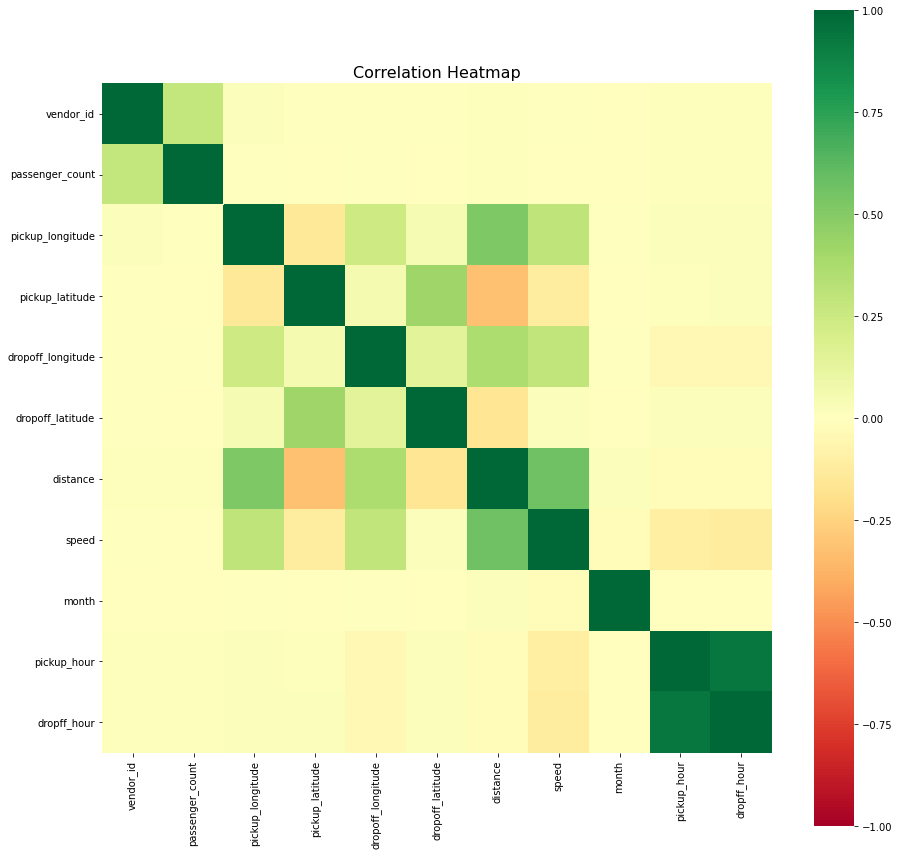

In [ ]:
df_corr = df.drop(labels='trip_duration',axis=1)
correlation = df_corr.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cmap='RdYlGn', vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
df_vif = df_corr.drop(columns=['id', 'pickup_datetime', 'dropoff_datetime','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_day','dropff_day',
       'dropff_hour','speed'])

In [ ]:
calc_vif(df_vif)

,variables,VIF
0,vendor_id,6.911603
1,passenger_count,2.819662
2,distance,1.708531
3,month,4.202105
4,pickup_hour,4.302427


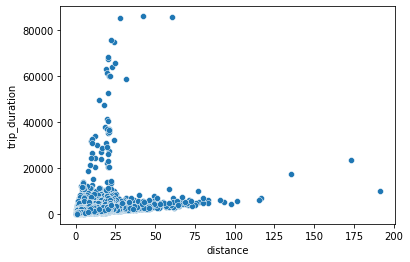

In [ ]:
sns.scatterplot(data=df, x="distance", y="trip_duration")


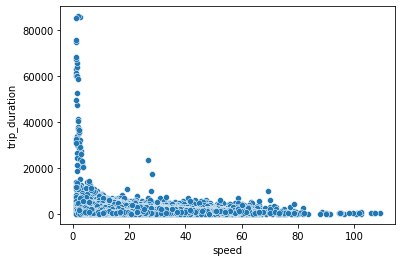

In [ ]:
sns.scatterplot(data=df, x="speed", y="trip_duration")


#***LINEAR REGRESSON***

In [189]:
#importing the libraries required for linear regression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score


In [190]:
#creating a copy of the df for linear regression
lr_df = df.copy()

In [191]:
#week number of the year
lr_df['pickup_week'] = lr_df.pickup_datetime.dt.week

#week day number starts with monday = 0
lr_df['pickup_day'] = lr_df.pickup_datetime.dt.weekday

#minute of the hour
lr_df['minute'] = lr_df.pickup_datetime.dt.minute

#minute of the day
lr_df['pickup_minute'] = lr_df['pickup_hour'] * 60 + lr_df['minute']

lr_df.drop(columns=['minute'],inplace=True)


In [192]:
lr_df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed,month,pickup_day,pickup_hour,dropff_day,dropff_hour,pickup_week,pickup_minute
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,11.856445,3,0,17,Monday,17,11,1044
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,9.803672,6,6,0,Sunday,0,23,43


In [193]:
#dummify the categorical variables 
lr_df = pd.get_dummies(lr_df,columns =['vendor_id', 'passenger_count', 'store_and_fwd_flag','month','pickup_day', 'pickup_hour','pickup_week'],
                        prefix=["vendor", "passenger","flag","month","day","hour","week"])

In [194]:
#get rid of the columns that we don't need
#to avoid the dummy trap we will drop one column for every dummified categorical column
lr_df.drop(columns=['id','pickup_datetime', 'dropoff_datetime','speed','dropff_day','dropff_hour',
                    'vendor_1','passenger_1', 'flag_N','month_1','day_0','hour_0','week_1'],inplace=True)

In [195]:
lr_df.shape

(1439744, 74)

In [196]:
lr_df.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_duration', 'distance', 'pickup_minute',
       'vendor_2', 'passenger_2', 'passenger_3', 'passenger_4', 'passenger_5',
       'passenger_6', 'flag_Y', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'week_2', 'week_3',
       'week_4', 'week_5', 'week_6', 'week_7', 'week_8', 'week_9', 'week_10',
       'week_11', 'week_12', 'week_13', 'week_14', 'week_15', 'week_16',
       'week_17', 'week_18', 'week_19', 'week_20', 'week_21', 'week_22',
       'week_23', 'week_24', 'week_25', 'week_26', 'week_53'],
      dtype='object')

In [197]:
#list of features to be used for training and testing 
features_rf = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'distance', 'pickup_minute',
       'vendor_2', 'passenger_2', 'passenger_3', 'passenger_4', 'passenger_5',
       'passenger_6', 'flag_Y', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'week_2', 'week_3',
       'week_4', 'week_5', 'week_6', 'week_7', 'week_8', 'week_9', 'week_10',
       'week_11', 'week_12', 'week_13', 'week_14', 'week_15', 'week_16',
       'week_17', 'week_18', 'week_19', 'week_20', 'week_21', 'week_22',
       'week_23', 'week_24', 'week_25', 'week_26', 'week_53']

In [198]:
#creating an array of independent variable for faster run of our model
X_rf = np.array(lr_df[features_rf])

In [199]:
# using minmacscalar to build the scaler model to help tackle the outlier effect 
scaler = MinMaxScaler()

# fit 
scaler.fit(X_rf)

# transform 
X_rf = scaler.transform(X_rf)

In [200]:
#array of dependent variable
y_rf = np.array(lr_df['trip_duration'])

In [201]:
#train test split of the model in 80:20 ratio
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split( X_rf,y_rf , test_size = 0.2, random_state = 123) 
print(X_rf_train.shape)
print(X_rf_test.shape)

(1151795, 73)
(287949, 73)


In [202]:
#fitting the model on the train split
regressor = LinearRegression().fit(X_rf_train, y_rf_train)

In [203]:
#predicting on the test split
y_rf_pred = regressor.predict(X_rf_test)


#root mean squared error 
rmse = np.sqrt(metrics.mean_squared_error(y_rf_test,y_rf_pred))
print(rmse)

483.3217255103606


In [204]:
#R2 score
r2_score(y_rf_test,y_rf_pred)

0.5510401121800259

#**Our model has been able to predict 55% of the dependent variables given the independent variables. Not a good score to start with so we will move forward with other algorithms.We could have used Lasso and Ridge regression but that still won't make that big an improvement that we would stop there.So we will try some other model to train and test our data on.**

In [205]:
#estimated coefficients for the model
regressor.coef_

array([-1.74020957e+03,  1.00745376e+03, -3.02209334e+03, -1.89760836e+03,
        2.65594777e+04, -2.33944675e+02,  1.02442877e+00,  2.39089851e+01,
        2.82914537e+01,  4.11115680e+01,  6.46883645e+00,  5.71552233e+00,
        3.77814485e+01,  6.96724862e+13,  6.96724862e+13,  6.96724862e+13,
        6.96724862e+13,  6.96724862e+13,  7.69447530e+01,  9.75635047e+01,
        1.08386895e+02,  8.93461109e+01,  7.27527319e+00, -5.85217498e+01,
       -1.53839047e+01, -2.81147102e+01, -4.58681252e+01, -1.12580859e+02,
       -1.97744086e+02, -7.84943252e+01,  1.10304070e+02,  2.41300379e+02,
        2.76669794e+02,  2.92509766e+02,  3.20212891e+02,  3.34123047e+02,
        3.43141968e+02,  3.82210938e+02,  4.13644531e+02,  4.15046875e+02,
        4.08218750e+02,  3.68687500e+02,  2.97089844e+02,  2.40957031e+02,
        2.32847656e+02,  2.50023438e+02,  2.31785156e+02,  2.98648987e+01,
        4.19760742e+01,  1.52666992e+02, -6.96724862e+13, -6.96724862e+13,
       -6.96724862e+13, -

In [206]:
#estimated intercept for the model
regressor.intercept_

3334.7166221616503